<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<center><h1>Transfer Learning</center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#section1)<br>
**2.** [**What is Transfer Learning**](#section2)<br>
**3.**[**Convolutional Neural Network**](#section3)<br>
**4.** [**Repurposing a Pre-trained Model**](#section4)<br>
**5.** [**Transfer Learning Process**](#section5)<br>
**6.** [**Classifiers on Top of Deep Convolutional Neural Networks**](#section6)<br>
**7.** [**Dogs vs Cats Classification using Transfer Learning**](#section7)<br>
  - **7.1.**  [**Loading Libraries**](#section701)
  - **7.2.**  [**Data Preprocessing**](#section702)
       - **7.2.1.**  [**Downloading Data**](#section70201)
       - **7.2.2.**  [**Configuring the Dataset for Performance**](#section70202)
       - **7.2.3.**  [**Using Data Augmentation**](#section70203)
       - **7.2.4.**  [**Rescaling Pixel Values**](#section70204)
  - **7.3.**  [**Creating the Base model from the Pre-trained Convnets**](#section703)
  - **7.4.**  [**Feature Extraction**](#section704)
       - **7.4.1.**  [**Freezing the Convolutional Base**](#section70401)
       - **7.4.2.** [**Usage of BatchNormalization Layers**](#section70402)
  - **7.5.**  [**Adding a Classification Head**](#section705)
  - **7.6.**  [**Creating the Base Model from the Pre-trained Convnets**](#section706)
  - **7.7.**  [**Compiling the Model**](#section707)
  - **7.8.**  [**Training the Model**](#section708)
  - **7.9.**  [**Learning Curves**](#section709)
  - **7.10.** [**Fine Tuning**](#section7010)
  - **7.11.** [**Un-freezing the Top Layers of the Model**](#section7011)
  - **7.12.** [**Compiling the Model**](#section7012)
  - **7.13.** [**Continuing Training the Model**](#section7013)
  - **7.14.** [**Evaluation and Prediction**](#section7014)
  - **7.15.** [**Summary**](#section7015)

---
<a name = Section1></a>
# **1. Introduction**
---

- In the recent **world** of technologies, at a very fast pace, Deep Learning is becoming a key **instrument** in artificial **intelligence** applicatons.

- For example in areas such as:

  - **Computer Vision**

  - **Natural Language Processing**

  - **Speech Recognition**


- In all these sectors, deep learning is producing **remarkable** results.

<br>
<center><img src="https://stackabuse.s3.amazonaws.com/media/deep-learning-in-keras-building-a-deep-learning-model-1.png" width="650" height="400"/></center>

- One of the areas where deep learning **excels** is Image Classification, which we have dealt with in **earlier classes**.

- The goal in **image classification** is to classify a **specific** picture according to a set of possible **categories**.

- From a deep learning perspective, the image **classification** problem can be solved thorugh **transfer learning**. 

- Actually, several **state-of-the-art** results in image classififcation are based on transfer learning solutions.


- This notebook will guide you to different **aspects** mentioned below in an organised way:

  - **Transfer Learning**

  - **Convolutional Neural Network**

  - **Repurposing a Pre-trained Model**

  - **Transfer Learning Process**

  - **Classifiers on Top of Deep Convolutional Neural Network**

---
<a name = Section2></a>
# **2. What is Transfer Learning?**
---

- It is a popular **method** in Computer Vision as it allows us to build **accurate** models in a **timesaving** way.

- With **transfer learning**, instead if starting the learning process from **scratch**, we start from **patterns** that have been learned when solving a different **problem**.

- This way we **leverage** previous learning and **avoid** starting from **scratch**.

- We can consider it as a deep learnign version of Chartres' expression **`standing on the shoulder of giants`** which means **Discovering** truth by building on previous **discoveries**.

<br>
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image%202.png" width="750px" height="450px"/></center>

- Conventional machine learning and deep learning algorithms are **designed** to work in **isolation**.

- These algorithms are **trained** to solve some kind of **specific** task.

- The **models** have to be rebuilt from scratch once the **feature-space** distribution changes.

- The image below gives us a better idea of how **transfer** learning differs from **traditional** ML techniques.

<br>
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image%203.png" width="850px" height="450px"/></center>

---
<a name = Section3></a>
# **3. Convolutional Neural Network**
---

- Several pre-trained **models** used in Transfer learning are based on **large** CNN.

- CNN was shown to **excel** in a **wide range** of computer vision tasks.

- The **two** main factors driving the **popularity** of CNN over years are:

    - **High Performance**

    - **Easeness in training**


- A typical CNN has two parts:

  1. **Convolutional Base:**

     - Composed of **Convolutional base** to generate features from the image.

     - **Generate features** from the image.

  2. **Classifier:**

      - Composed by **fully connected layer**

      - Classify the image based on the **detected features**
    
- A fully **connected** layer is the one whose **neurons** have full connections to all **activation** in the previous layer.


<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image4.png" width="800" height="380" /><center>

- One most important aspect of the deep learning models is that they can automatically learn **hierarchical feature respresentations** meaning:

  - **Features** computed by the first layer are **general** an can be reused in **different** problem **domains**, while features **computed** by the last layer are **specific** and depend on the **chosen** dataset an task.

  - If first-layer features are **general** and last-layer features are **specific**, then there must be a **transition** from general to specific somewhere in the network.

  - As a result, the base of our CNN-espacially its **lower** layers(those who are closer to the inputs) - refer to **general** features, whereas the **classifier** part, and some of the highest layers of the **convolutional** base, refering to **specialised** features.

---
<a name = Section4></a>
# **4. Repurposing a Pre -Trained Model**
---

- When we are **repurposing** a pre-trained model for your own **needs**, we start by removing the original **classifier**, then adding a new classifier that fits our **purposes** and finally **fine-tuning** the model according to mentioned **three** strategies:

- **Train the entire model:**

    - We use the **architecture** of the pre trained model and **train** it according to the dataset.

    - Learning the model from **scratch**, so need a large dataset and a lot of **computational** power.

- **Train some layers and leave others frozen:**

    - Lower layers refer to **general features** (independent), while higher layers refer to **specific features** (dependent).

    - Choose how much we want to **adjust** the **weights** of the network.

    - If we have small dataset and **large** number of **parameters**, we will leave more layers frozen to avoid **overfitting**.

    - On the contrary, if the dataset is large and the number of parameters is small, we can improve our model by training more layers to the new task since overfitting is not an issue.
    

- **Freezing the Convolutional Layer**

    - Keep the convolutional base in its *original* form and then use its output to **feed** the classifier.

    - Using the pretrained model as a **fixed feature** extraction meachanism, which can be useful is you're on **computational** power.

<center><img src = "https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/tl2.png" align="center" width="800" height="420"/></center>

- Unlike **Strategy 3**, whose application is straightforward, **Strategy 1** and **Strategy 2** require us to be **careful** with the learning rate used in the **convolutional** part.

- **Learning rate** is hyper-parameter that controls how much we **adjust** the weights of the network.

- While we are using **pre-trained** model on CNN, it's better to use a **small** learning rate because high learning rate **increase** the rate of **losing** previous knowledge.

---
<a name = Section2></a>
# **5. Transfer Learning Process**
---

- The entire **transfer learning** process can be **summarised** as follows:

- **Select a pre-trained model**

  - Pick the pre-trained which looks **suitable** for the problem.

  - For example, in Keras we have **multiple model** options such as 

    - **VGG(Visual Geometry Group)**

    - **InceptionV3**

    - **ResNet5**

    
  - Check all the models available on **Keras**- https://keras.io/applications/

- **Classify the problem according to Size-Similarity matrix**

  - As a thumb rule, consider the dataset is small if it has less than **1000** **images** per class.
  
  - The matrix **classifies** the CV problem considering the size of your dataset and its **similarity** to the dataset in which the **pre-trained** model was trained.

- **Fine-tune your model**

  - The **size-similarity** matrix to guide the choice.
  
  - Refering to the three above mentioned options about **repurposing** a pre-trained **model**.

| Quadrant | Description|
| ----- | ---- |
| Quadrant 1 | Large dataset but different from the pre-trained model's dataset. |
| Quadrant 2 | Large dataset and similar to the pre-trained model's dataset. |
| Quadrant 3 | Small dataset and different fro pre-trained model's datset |
| Quadrant 4 | Small dataset, but similar to pre-trained model's dataset |

<table>
<tr>
<td><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/tl4.png" width="350px"height="320"/></td>
<td><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/tl3.png" width="350px"height="320"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Size Similarity matrix</td>
<td style="font-weight:bold; font-size:16px;">Decision map for fine tuning pre-trained models</td>
</tr>
</table>

---
<a name = Section6></a>
# **6. Classifiers on Top of Deep Convolutional Neural Networks**
---

- Models for image **classification** that result from a transfer **learning** approach based on pre-trained **convolutional** neural networks are usually **composed** of two parts:

  1. **Convolutional base**, which performs **feature** extraction.

  2. **Classifier**, which **classifies** the input image based on the features extracted by the convolutional base.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image%205.png" width="650" height="380"/></center>

- Below are the **different** approaches which can be **followed** to build the **classifier**.

- **Fully-connected layers:**

  - For image **classification**, the approach should be to use a **stack** of fully-connected layers followed by a **softmax** activated layer.

  - The **Softmax** layer outputs the **probability** distribution over each possible class label and then we just need to **classify** the image according to the most **probable** class.

- **Global average pooling:**

  - In this, instead of adding **fully** connected layers on top of the **convolutional** base, we add a **gloabal** average pooling layer.

  - Feed its output directly into **softmax** activated layer.

- **Linear Support Vector Machine:**

  - We can improve **classification** accuracy by training a linear SVM classifeir on the features **extracted** by the **convolutional** base.


---
<a name = Section7></a>
# **7. Dogs vs Cats Classification using Transfer Learning**
---

- Now, we will learn how to **classify** images of cats and dogs by using **transfer learning** using a **pre-trained** network.

- A pre-trained model is a **saved** network that was previously **trained** on a large dataset, typically on a **large-scale** image-classification task.

  - You either use the **pretrained model** as is or use transfer learning to **customize** this model to a given **task**.

- The intuition behind **transfer** learning for image **classification** is that if a model is trained on a **large** and general **enough dataset**, this model will **effectively** serve as a **generic model** of the visual world. 

  - We can then take **advantage** of these learned **feature** maps without having to start from **scratch** by training a **large model** on a large dataset.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image%206.gif" width="800" height="420"/></center>


- Here, we will try two ways to **customize** a pretrained model:

  - **Feature Extraction:**

    - Use the representations learned by a previous **network** to extract **meaningful features** from new samples. 

    - We simply add a new classifier, which will be **trained** from scratch, on top of the **pretrained** model so that you can repurpose the feature maps learned previously for the dataset.

    - We do not need to **re-train** the **entire** model. 
    
    - The base convolutional network already **contains** features that are **generically** useful for **classifying** pictures. 

    - However, the final, **classification** part of the pretrained model is specific to the **original** classification task, and **subsequently** specific to the set of **classes** on which the **model** was trained.

  - **Fine-Tuning:**

    - We will **Unfreeze** a few of the top layers of a frozen model base and jointly train both the newly-added **classifier** layers and the last layers of the base model.
    
    - This allows us to **fine-tune** the higher-order **feature** representations in the **base model** in order to make them more **relevant** for the specific task.

- We will follow the general machine learning workflow.

  - **Examine** and understand the data

  - Build an **input pipeline**, in this case using Keras ImageDataGenerator

  - **Compose** the model

    - Load in the **pretrained base model** (and pretrained weights)

    - Stack the **classification** layers on top

  - **Train the model**

  - **Evaluate** the model

<a id=section701></a>
### **7.1 Loading Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


from tensorflow.keras.preprocessing import image_dataset_from_directory

<a id=section702></a>
### **7.2 Data Preprocessing**

<a id=section70201></a>
#### **7.2.1 Downloading Data**

- We will use a dataset **containing** several thousand images of cats and dogs.

- Now, we will download and **extract** a zip file containing the images, then create a **`tf.data.Dataset`** for training and **validation** using the **`tf.keras.preprocessing.image_dataset_from_directory`** utility.

- We can learn more about loading images in this [**tutorial**](https://www.tensorflow.org/tutorials/load_data/images).

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

68606236/68606236 [==============================] - 1s 0us/step
Found 2000 files belonging to 2 classes.


In [3]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


- First we need to set the **path** to our file and **extract** the zip file (this can also be applied to the file located in the **local system**).

- Then we set the **train** and **validation** directories.

- Now, we set **`BATCH_SIZE=32`** and**` IMG_SIZE=(160, 160)`**.

- We create the train and validation datasets using **`tf.keras.preprocessing.image_dataset_from_directory`** with parameters set to:

   -  **`directory=train_dir/validation_dir`**

   - **`shuffle=True`**

   -  **`batch_size=BATCH_SIZE`**
   
   - **`image_size=IMG_SIZE`**

- Now we will print the **first nine images** and their labels from the **training** set.

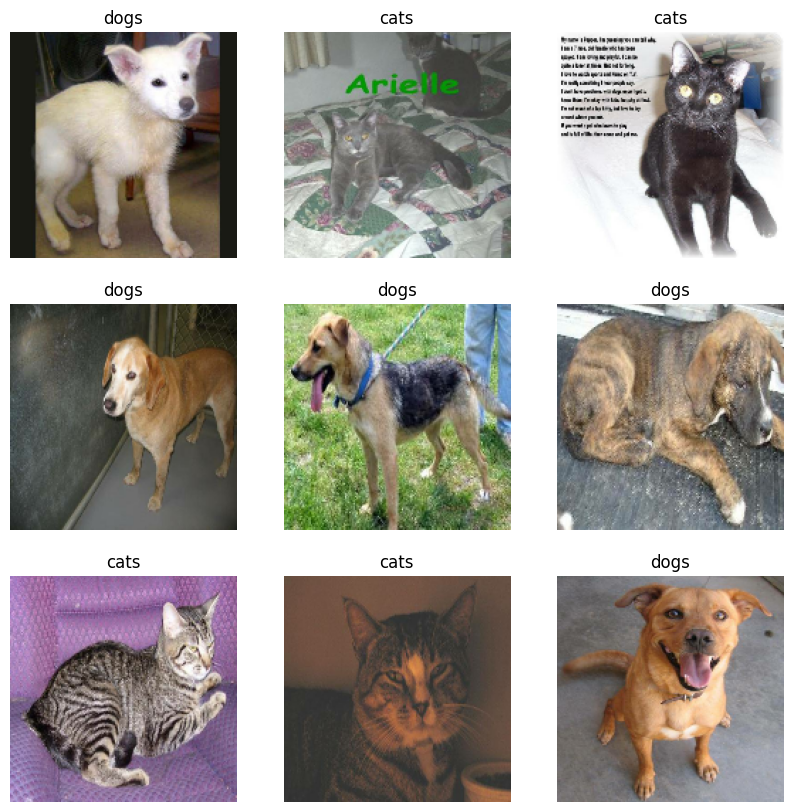

In [4]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

- As the original **dataset** doesn't contains a test set, we will **create** one. 

- To do so, we will determine how many batches of data are available in the **validation** set using **`tf.data.experimental.cardinality`**, then we will move 20% of them to a **test** set.

In [5]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [6]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


**Observation :**

- We are creating **test set** from the **validation** set.

- First we find the **cardinality** of the validation dataset using  **`tf.data.experimental.cardinality`**.

- Then we take first **6** batches ( as 32 // 5 = 6) for the test set using **`validation_dataset.take`**.

- We skip these **6 batches** using **`validation_dataset.skip`** and keep the remaining **26** batches in t he **validation** set.


<a id=section70202></a>
#### **7.2.2 Configuring the Dataset for Performance**

- We will use buffered **prefetching** to load images from the disk without having I/O become a **blockage**.

- To learn more about this **method** see the [**data performance**](https://www.tensorflow.org/guide/data_performance) guide.

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

**Note:** 

- These layers are **active** only during training, when you call **`model.fit`**. 

- They are inactive when the model is used in inference mode in **`model.evaulate`** or **model.fit**.

<a id=section70203></a>
#### **7.2.3 Using Data Augmentation**

- When we don't have a **large** image dataset, it's a good **practice** to artificially introduce sample **diversity** by applying **random**, yet realistic, **transformations** to the training images, such as **rotation** and horizontal flipping. 

- This helps expose the model to different **aspects** of the training data and reduce **overfitting**.

- We can learn more about **data augmentation** in this [**tutorial**](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [8]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

**Note:** 

- These layers are **active** only during **training**, when you call **`model.fit`**. 

- They are inactive when the model is used in **inference** mode in **`model.evaulate`** or **`model.fit`**.

- Let's repeatedly apply these **layers** to the same image and see the **result**.

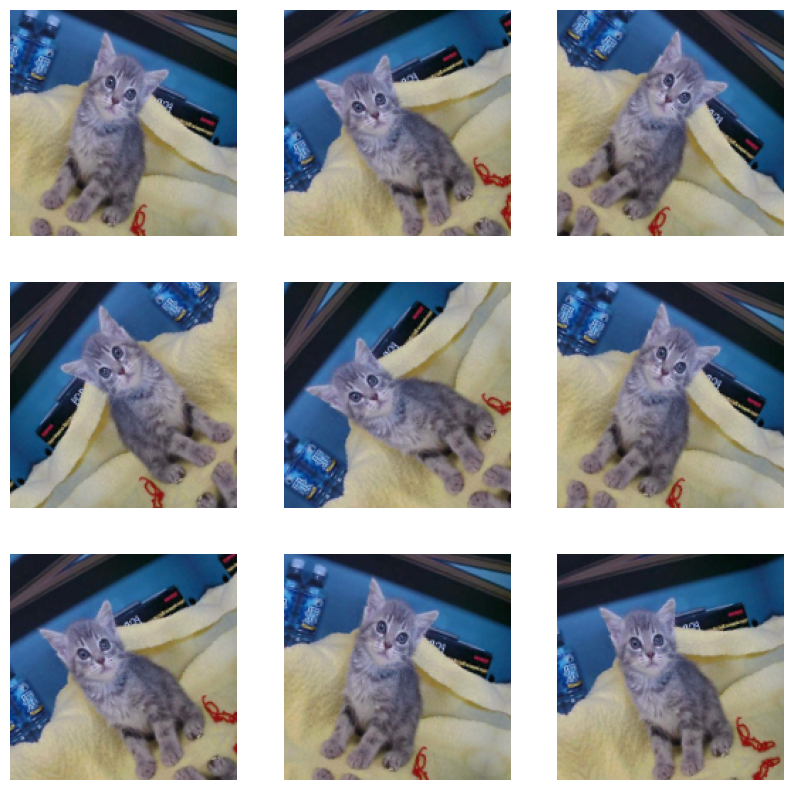

In [9]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

**Observation :**

- We create a data **agumentaion** pipeline using **`tf.keras.Sequential`**.

- We can create differernt data agumentation layer using **`tf.keras.layers.experimental.preprocessing`** which can used to **flip**, **rotate**, and **zoom** to create more sample image.

- In the above code we have used **horizontal** filp and **rotation** of 0.2.

<a id=section70204></a>
#### **7.2.4 Rescaling Pixel Values**

- In a moment, we will download **`tf.keras.applications.MobileNetV2`** for use as your **base** model.

- This **model** expects pixel vaues in `[-1, 1]` range, but at this point, the pixel values in our images are in `[0-255]` range.

- To rescale them, we will use the **preprocessing** method included with the **model**.

In [12]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

**Note:** 

- Alternatively, we could **rescale** pixel values from `[0,255]` to `[-1, 1]` using a [**Rescaling**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling) layer.

In [14]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

**Note:** 
- If using other `tf.keras.applications`, be sure to check the **API** doc to determine if they expect pixels in `[-1,1]` or `[0,1]`, or use the included **`preprocess_input`** function.

<a id=section703></a>
### **7.3 Creating the Base Model from the Pre-trained Convnets**

- We will create the **base** model from the **MobileNet V2** model developed at **Google**.

- This is **pre-trained** on the ImageNet dataset, a large dataset **consisting** of **1.4M** images and **1000** classes.

  - **ImageNet** is a research training dataset with a wide variety of **categories** like `jackfruit` and `syringe`.

  - This base of **knowledge** will help us classify cats and dogs from our **specific** dataset.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/Image7.png" width="800" height="400"/></center>

- First, we need to pick which **layer** of MobileNet V2 we will use for **feature extraction**.

- The very last **classification** layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful.  

  - Instead, we will follow the common practice to **depend** on the very **last layer before** the **flatten** operation. 

  - This layer is called the **"bottleneck layer"**.

- The **bottleneck** layer features retain more **generality** as compared to the final/top layer.

- First, **instantiate** a MobileNet V2 model **pre-loaded** with **weights** trained on ImageNet. 

- By specifying the **include_top=False** argument, we load a network that doesn't include the classification layers at the top, which is ideal for **feature extraction**.

In [11]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [16]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

- This feature extractor **converts** each **160x160x3** image into a **5x5x1280** block of features. 

- Let's see what it does to an **example** batch of images:

In [17]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


<a id=section704></a>
### **7.4 Feature Extraction**

- In this step, we will **freeze** the convolutional base created from the previous **step** and to use as a **feature** extractor.

- Additionally, we add a **classifier** on top of it and train the **top-level** classifier.

<a id=section70401></a>
#### **7.4.1 Freezing the Convolutional Base**

- It is important to freeze the **convolutional** base before you **compile** and train the model.

- **Freezing** (by setting **`layer.trainable = False`**) prevents the weights in a given layer from being updated during **training**. 

- **MobileNet V2** has many layers, so setting the entire model's **`trainable`** flag to **False** will freeze all of them.

In [ ]:
base_model.trainable = False

<a id=section70402></a>
#### **7.4.2 Usage of BatchNormalization Layers**

- Many **models** contain **`tf.keras.layers.BatchNormalization`** layers. 

- This layer is a special case and precautions should be taken in the context of **fine-tuning**, as shown later in this notebook. 

- When we set **`layer.trainable = False`**, the **`BatchNormalization`** layer will run in inference mode, and will not update its mean and **variance** **statistics**. 

- When we **unfreeze** a model that contains **BatchNormalization** layers in order to do fine-tuning, we should keep the **BatchNormalization** layers in **inference** mode by passing **`training = False`** when calling the **base** model. 

- Otherwise, the updates **applied** to the non-trainable **weights** will **destroy** what the model has learned.

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

<a id=section705></a>
### **7.5 Adding a Classification Head**

- To generate **predictions** from the block of features, **average** over the `5x5` spatial locations, using a **`tf.keras.layers.GlobalAveragePooling2D`** layer to convert the **features** to  a single 1280-element **vector** per image.

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


- Apply a `tf.keras.layers.Dense` layer to **convert** these features into a **single prediction** per image.

- We don't need an **activation** function here because this **prediction** will be treated as a **`logit`**, or a raw prediction value.

- **Positive** numbers predict class **1**, **negative** numbers **predict** class 0.

In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


- Build a model by **chaining** together the **data augmentation**, **rescaling**, **base_model** and **feature extractor** layers using the [**Keras Functional API**](https://www.tensorflow.org/guide/keras/functional). 

  - Keras Functional API will be **covered** in detail in NLP-II    

- As previously mentioned, use **training=False** as our model contains a **BatchNormalization** layer.

In [21]:
inputs = tf.keras.Input(shape=(160, 160, 3))

x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

<a id=section706></a>
### **7.6 Compiling the Model**

- **Compile** the model before training it.

- Since there are two classes, use a **binary cross-entropy** loss with **`from_logits=True`** since the model provides a **linear** output.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

- The **2.5M** parameters in MobileNet are **frozen**, but there are **1.2K trainable** parameters in the Dense layer. 

- These are **divided** between two **`tf.Variable`** objects, the weights and biases.

In [ ]:
len(model.trainable_variables)

2

<a id=section707></a>
### **7.7 Training the Model**

- After **training** for **10** epochs, you should see **~94%** accuracy on the **validation** set.

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 15s 505ms/step - loss: 0.6690 - accuracy: 0.5383


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.65
initial accuracy: 0.58


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 54s 810ms/step - loss: 0.6211 - accuracy: 0.6410 - val_loss: 0.4550 - val_accuracy: 0.7364
Epoch 2/10
63/63 [==============================] - 51s 802ms/step - loss: 0.4682 - accuracy: 0.7575 - val_loss: 0.3458 - val_accuracy: 0.8230
Epoch 3/10
63/63 [==============================] - 51s 805ms/step - loss: 0.3981 - accuracy: 0.8040 - val_loss: 0.2713 - val_accuracy: 0.8738
Epoch 4/10
63/63 [==============================] - 52s 820ms/step - loss: 0.3307 - accuracy: 0.8295 - val_loss: 0.2252 - val_accuracy: 0.9121
Epoch 5/10
63/63 [==============================] - 51s 805ms/step - loss: 0.3058 - accuracy: 0.8550 - val_loss: 0.1895 - val_accuracy: 0.9257
Epoch 6/10
63/63 [==============================] - 52s 816ms/step - loss: 0.2711 - accuracy: 0.8715 - val_loss: 0.1697 - val_accuracy: 0.9282
Epoch 7/10
63/63 [==============================] - 51s 806ms/step - loss: 0.2564 - accuracy: 0.8805 - val_loss: 0.1585 - val_accuracy: 0.9332

<a id=section708></a>
### **7.8 Learning Curves**

- Let's take a look at the **learning** curves of the training and validation accuracy/loss when using the **MobileNet V2** base model as a **fixed** feature extractor.

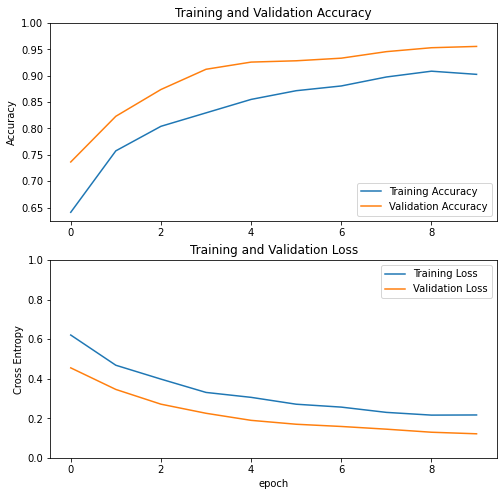

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Note:** 

- If you are wondering why the **validation** metrics are clearly better than the **training** metrics, the main factor is because layers like **`tf.keras.layers.BatchNormalization`** and **`tf.keras.layers.Dropout`** affect accuracy during training. They are **turned** off when calculating **validation** loss.

- To a lesser extent, it is also because **training** metrics report the **average** for an epoch, while validation metrics are **evaluated** after the epoch, so validation **metrics** see a model that has trained **slightly** longer.

<a id=section709></a>
### **7.9 Fine Tuning**


- In the **feature** extraction experiment, we were only **training** a few layers on top of an **MobileNet V2** base model. 

- The weights of the **pre-trained** network were **not** updated during training.

- One way to **increase performance** even further is to **train** (or **`fine-tune`**) the **weights** of the top layers of the pre-trained model alongside the training of the **classifier** you added. 

- The training process will force the **weights** to be **tuned** from **generic** feature maps to features **associated** specifically with the **dataset**.

**Note:** 

- This should only be **attempted** after you have **trained** the **top-level classifier** with the **pre-trained** model set to **non-trainable**. 

- If we add a randomly **initialized** classifier on top of a **pre-trained** model and attempt to train all layers **jointly**, the magnitude of the **gradient** updates will be too **large** (due to the **random weights** from the classifier) and your pre-trained model will **forget** what it has **learned**.

- We should try to **fine-tune** a **small number** of **top layers** rather than the whole **MobileNet** model.

-  In most convolutional networks, the **higher** up a **layer** is, the more **specialized** it is. 

    - The **first** few layers **learn** very **simple** and **generic features** that **generalize** to almost all types of images.

    - As we go higher up, the **features** are increasingly more **specific** to the dataset on which the model was **trained**. 

- The goal of **fine-tuning** is to adapt these specialized **features** to work with the new dataset, rather than **overwrite** the generic learning.

<a id=section7010></a>
### **7.10  Un-freezing the Top Layers of the Model**

- All you need to do is **unfreeze** the **`base_model`** and set the **bottom layers** to be **un-trainable**. 

- Then, you should **recompile** the model (necessary for these changes to take effect), and **resume** training.

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


<a id=section7011></a>
### **7.11 Compiling the Model**

- As we are **training** a much larger model and want to **readapt** the pretrained weights, it is important to use a **lower learning rate** at this stage. 

- Otherwise, your **model** could **overfit** very quickly.


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
len(model.trainable_variables)

56

<a id=section7012></a>
### **7.12 Continuing Training the Model**

- If we trained to **convergence** earlier, this step will improve our **accuracy** by a few **percentage** points.

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 79s 1s/step - loss: 0.1692 - accuracy: 0.9214 - val_loss: 0.0497 - val_accuracy: 0.9777
Epoch 11/20
63/63 [==============================] - 75s 1s/step - loss: 0.1187 - accuracy: 0.9507 - val_loss: 0.0396 - val_accuracy: 0.9864
Epoch 12/20
63/63 [==============================] - 75s 1s/step - loss: 0.1024 - accuracy: 0.9583 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 13/20
63/63 [==============================] - 75s 1s/step - loss: 0.0875 - accuracy: 0.9628 - val_loss: 0.0784 - val_accuracy: 0.9740
Epoch 14/20
63/63 [==============================] - 75s 1s/step - loss: 0.0867 - accuracy: 0.9725 - val_loss: 0.0306 - val_accuracy: 0.9851
Epoch 15/20
63/63 [==============================] - 77s 1s/step - loss: 0.0780 - accuracy: 0.9679 - val_loss: 0.0414 - val_accuracy: 0.9802
Epoch 16/20
63/63 [==============================] - 77s 1s/step - loss: 0.0863 - accuracy: 0.9690 - val_loss: 0.0324 - val_accuracy: 0.9864
Epoch 17/20
6

- Let's take a look at the **learning** curves of the **training** and **validation** accuracy/loss when **fine-tuning** the last few layers of the MobileNet **V2** base model and training the **classifier** on top of it. 



- After **fine tuning**, the model nearly reaches **98%** accuracy on the **validation** set.

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

Text(0.5, 0, 'epoch')

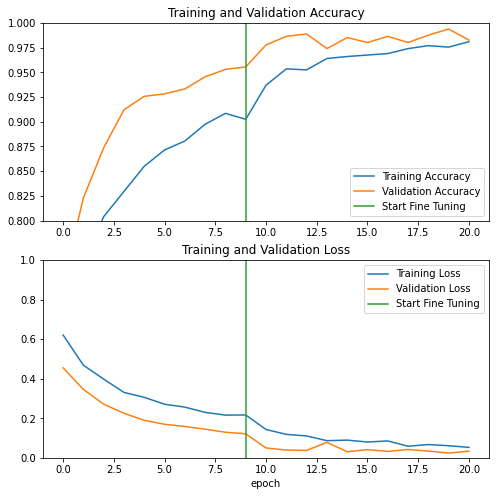

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

**Observations:**

- We may get some **overfitting** as the new training set is **relatively** small and similar to the original **MobileNet V2** datasets.

<a id=section7013></a>
### **7.13 Evaluation and Prediction**

- Finally we can verify the **performance** of the model on new **data** using the **test** set.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 4s 531ms/step - loss: 0.0326 - accuracy: 0.9896
Test accuracy : 0.9895833134651184


- **Observation:**

- **Accuracy** on test set is found to be **98.96%**.

- And now we are all set to **use** this model to **predict** if your pet is a **cat** or a **dog**.

Predictions:
 [1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1]
Labels:
 [1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1]


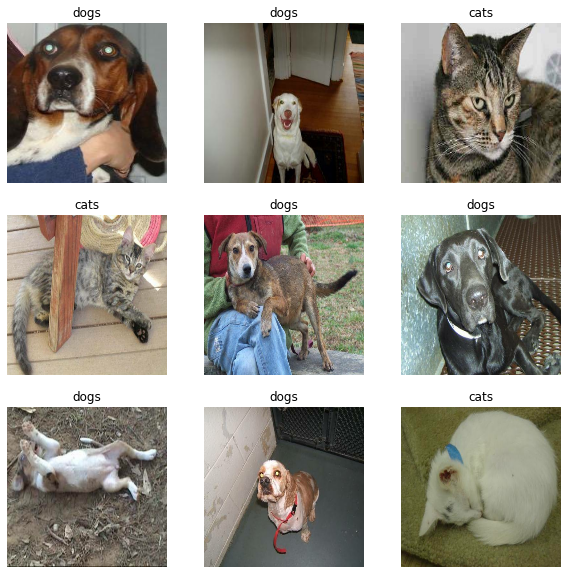

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

<a id=section7014></a>
### **7.14  Summary**

- **Using a pre-trained model for feature extraction**: 

  - When working with a **small** dataset, it is a **common** practice to take advantage of **features** learned by a model **trained** on a **larger** dataset in the same **domain**. 

  - This is done by **instantiating** the **pre-trained** model and adding a fully-connected **classifier** on top.

  - The pre-trained model is **frozen** and only the **weights** of the classifier get **updated** during training.

  - In this case, the convolutional **base** extracted all the **features** associated with each image and we just **trained** a classifier that **determines** the image class given that set of **extracted features**.

- **Fine-tuning a pre-trained model**: 

  - To further improve **performance**, one might want to **repurpose** the top-level layers of the **pre-trained** models to the new dataset via **fine-tuning**.

  - In this case, we tuned our **weights** such that our **model** learned high-level **features** specific to the dataset. 

  - This technique is usually **recommended** when the training **dataset** is large and very similar to the **original** dataset that the **pre-trained** model was trained on.

- To learn more, visit the [**Transfer learning guide**](https://www.tensorflow.org/guide/keras/transfer_learning).